In [74]:
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def pdistskew(x):
    alpha=10.0
    return (1/np.sqrt(np.pi) * np.exp(-x**2))*(1+erf(alpha*x/np.sqrt(2)))

def pdist(x):
    return (.2/np.sqrt(2*np.pi)) * np.exp((-(x+3)**2)/2) + (.8/np.sqrt(2*np.pi)) * np.exp((-(x-3)**2)/2)

def gradlogq(x,mu,l):
    return (x-mu)/(l**2), (x-mu)**2/(l**3)

def logq(x,mu,l):
    return np.log((1/np.sqrt(2*np.pi*l**2)))-(x-mu)**2/(l**2*2)

def q(x,mu,l):
    return (1/np.sqrt(2*np.pi*l**2))*np.exp((-(x-mu)**2)/(l**2*2))

def qsample(mu,l,n=1):
    return np.random.randn(n)*l+mu



In [79]:
mu = -3
l = 10

x = np.linspace(-6,6,1000)
for it in range(500):
    sample = qsample(mu,l,100000)
    grads = gradlogq(sample,mu,l)
    #print(grads)
    diff = (np.log(1e-100+pdist(sample)) - logq(sample,mu,l))
    vals = grads[0] * diff
    vals = vals[np.isfinite(vals)]
    mudelta = np.mean(vals)
    mu = mu + 0.1*mudelta
    
    vals = grads[1] * diff
    vals = vals[np.isfinite(vals)]
    ldelta = np.mean(vals)
    #if np.abs(ldelta)>1: ldelta = np.sign(ldelta)
    l = l + 0.05*ldelta    
    if (l<1e-1): l=1e-1
    
    #print(mu)
    t = (np.log(pdist(x))-np.log(q(x,mu,l)))
    t = q(x,mu,l)*t
    t = t[np.isfinite(t)]
    if it%10==0:  print("%0.2f, %0.3f, %0.2f, %0.3f, %0.5f" % (mudelta,mu,ldelta,l,-np.sum(t)*(x[1]-x[0])))
    #temp.append([mu,-np.sum(t)])

2.00, -2.800, -9.31, 9.534, 0.03433
0.96, -1.363, -5.02, 6.005, 0.31004
0.46, -0.698, -2.43, 4.267, 0.56929
0.28, -0.350, -1.25, 3.422, 0.73471
0.22, -0.116, -0.66, 2.980, 0.83413
0.20, 0.082, -0.39, 2.729, 0.89090
0.19, 0.271, -0.24, 2.578, 0.91567
0.20, 0.462, -0.20, 2.472, 0.92047
0.20, 0.662, -0.15, 2.387, 0.90945
0.22, 0.874, -0.15, 2.310, 0.88654
0.24, 1.103, -0.19, 2.222, 0.85522
0.27, 1.357, -0.25, 2.115, 0.81126
0.31, 1.647, -0.34, 1.970, 0.74673
0.37, 1.985, -0.48, 1.765, 0.63770
0.38, 2.362, -0.58, 1.495, 0.45874
0.27, 2.689, -0.50, 1.214, 0.28592
0.12, 2.874, -0.26, 1.029, 0.22814
0.05, 2.952, -0.12, 0.942, 0.22702
0.02, 2.981, -0.05, 0.903, 0.23277
0.01, 2.992, -0.02, 0.888, 0.23621
0.00, 2.996, -0.01, 0.880, 0.23803
0.00, 2.998, -0.01, 0.878, 0.23880
-0.00, 2.998, -0.00, 0.876, 0.23918
-0.00, 2.998, 0.00, 0.876, 0.23934
-0.00, 2.998, 0.00, 0.875, 0.23941
0.00, 2.998, -0.01, 0.876, 0.23932
-0.00, 2.998, -0.00, 0.875, 0.23952
0.00, 2.998, -0.01, 0.875, 0.23956
0.00, 2.999, 

In [80]:
mu

2.9982968595103574

In [81]:
l

0.8759278748150661

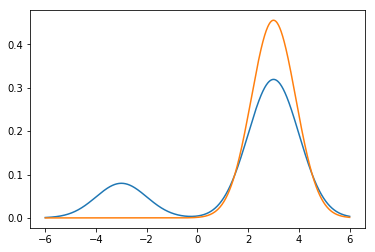

In [82]:
x = np.linspace(-6,6,1000)
plt.plot(x,pdist(x))
plt.plot(x,q(x,mu,l))